# Exploratory Data Analysis

In [94]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [96]:
file_path = "cleaned_heart_disease_dataset.csv" 
data = pd.read_csv(file_path)

### Target Variable Distribution

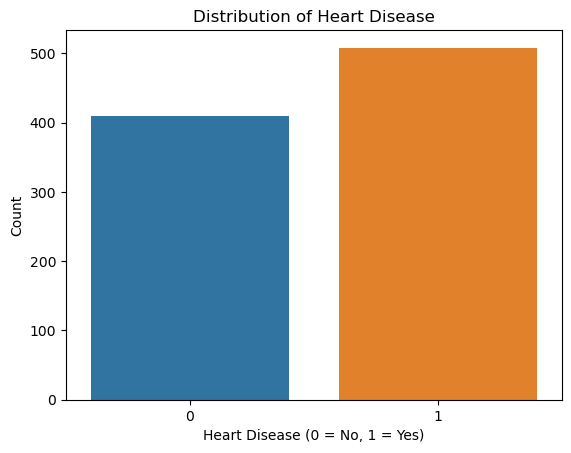

In [98]:
sns.countplot(x='HeartDisease', data=data)
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The count for both people with and without heart disease is relatively even. There are slightly more people with heart disease, but overall the dataset is balanced.

### Numerical Feature Distribution

C:\Users\ikesc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


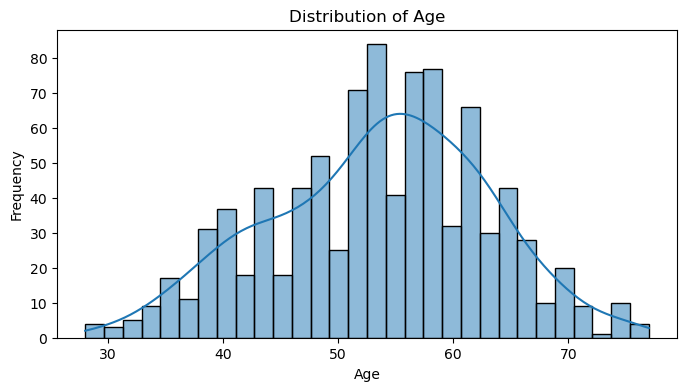

C:\Users\ikesc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


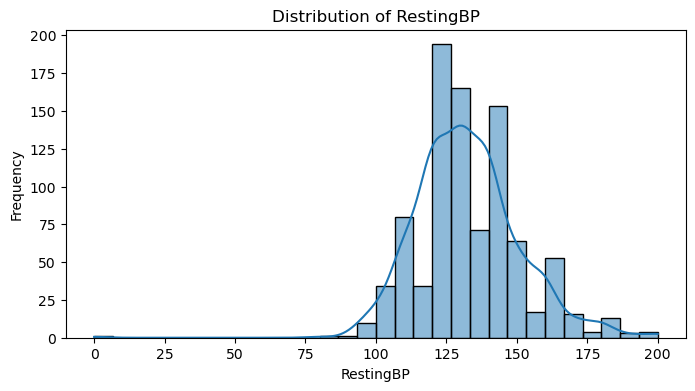

C:\Users\ikesc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


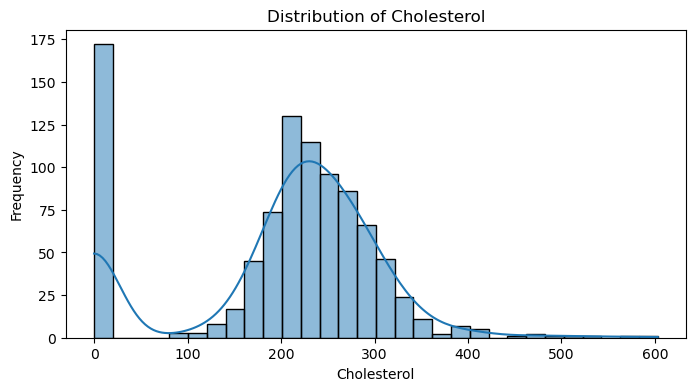

C:\Users\ikesc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


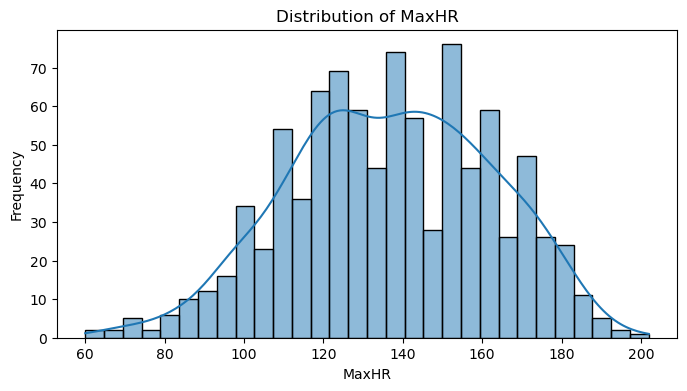

C:\Users\ikesc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


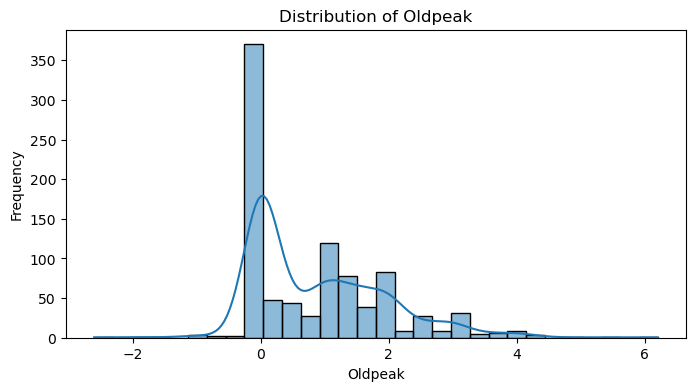

In [101]:

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Age Distribution: Most people in the dataset are between 50-60 years old, with the overall age distribution looking like a bell curve. This makes sense because middle-aged and older people are more likely to have heart problems.

RestingBP Distribution: Resting blood pressure is mostly between 120-140 mm Hg and looks pretty balanced on both sides. These numbers are close to what is considered normal or slightly high blood pressure.

Cholesterol Distribution: Cholesterol levels are mostly around 250 mg/dL, but the chart is skewed to the right, meaning some people have really high cholesterol. This could be important since high cholesterol is linked to heart problems.

MaxHR Distribution: Maximum heart rate is usually between 130-160 bpm and is evenly spread out. These numbers seem typical for the age group in the dataset.

Oldpeak Distribution: The Oldpeak values are mostly around 0-2, but there are some really high ones that stretch the chart. High values might show heart issues during exercise.

### Correlation Heatmap

In [85]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


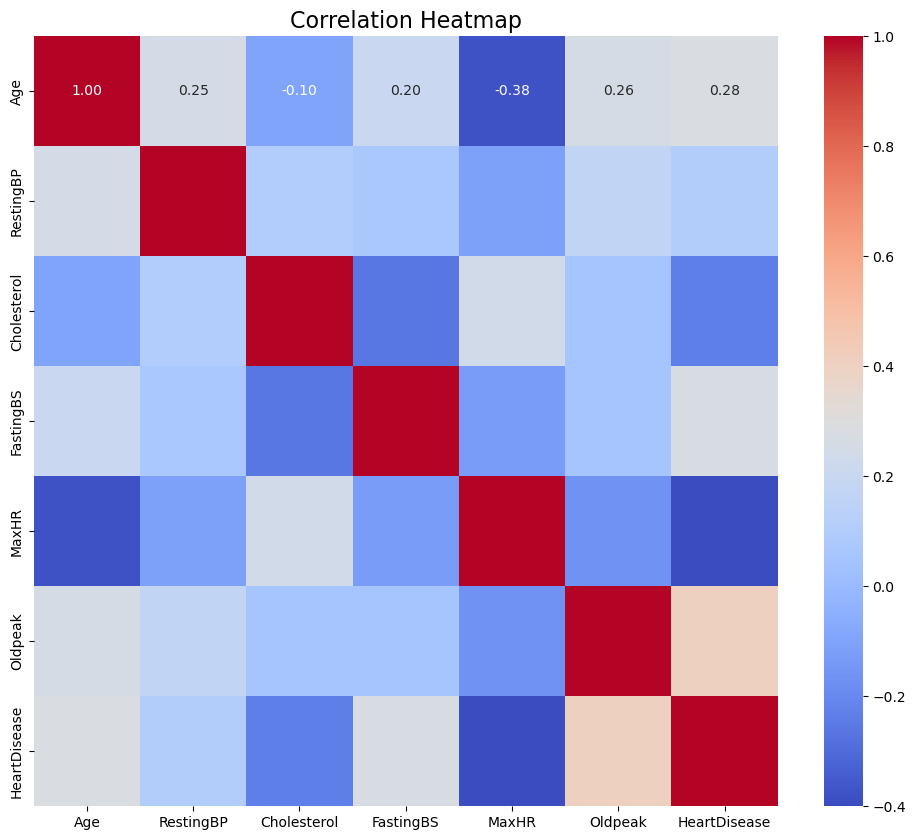


Correlation Levels with HeartDisease:
Strong Correlations (>= 0.5):
Series([], Name: HeartDisease, dtype: float64)

Moderate Correlations (0.3 to 0.5):
MaxHR     -0.400421
Oldpeak    0.403951
Name: HeartDisease, dtype: float64

Weak Correlations (< 0.3):
Age            0.282039
RestingBP      0.107589
Cholesterol   -0.232741
FastingBS      0.267291
Name: HeartDisease, dtype: float64


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.select_dtypes(include=[np.number])


correlation_matrix = numeric_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=16)
plt.savefig("correlation_heatmapHeartDisease.png", dpi=300, bbox_inches="tight")
plt.show()


correlations = correlation_matrix['HeartDisease'].drop('HeartDisease')


strong_corr = correlations[(correlations.abs() >= 0.5)]
moderate_corr = correlations[(correlations.abs() >= 0.3) & (correlations.abs() < 0.5)]
weak_corr = correlations[(correlations.abs() < 0.3)]


print("\nCorrelation Levels with HeartDisease:")
print("Strong Correlations (>= 0.5):")
print(strong_corr)

print("\nModerate Correlations (0.3 to 0.5):")
print(moderate_corr)

print("\nWeak Correlations (< 0.3):")
print(weak_corr)





Age shows a weak positive correlation (0.28) with HeartDisease, suggesting older individuals may be slightly more likely to develop heart disease. MaxHR is negatively correlated (-0.40), indicating that lower maximum heart rates are associated with higher risk. Oldpeak, which measures ST depression during exercise, has a moderate positive correlation (0.40) with HeartDisease, emphasizing its relevance in assessing exercise-induced heart stress. ExerciseAngina exhibits a strong positive relationship (0.49), making it one of the most important predictors. Interestingly, Cholesterol and RestingBP show weak or minimal correlation with HeartDisease, making them less impactful predictors in this dataset. Additionally, ST_Slope demonstrates the strongest negative correlation (-0.56), reinforcing its critical role in prediction. These correlations highlight associations but do not imply causation, as complex interactions may still make weaker correlations relevant in prediction models.


### Boxplot of Feature Relations

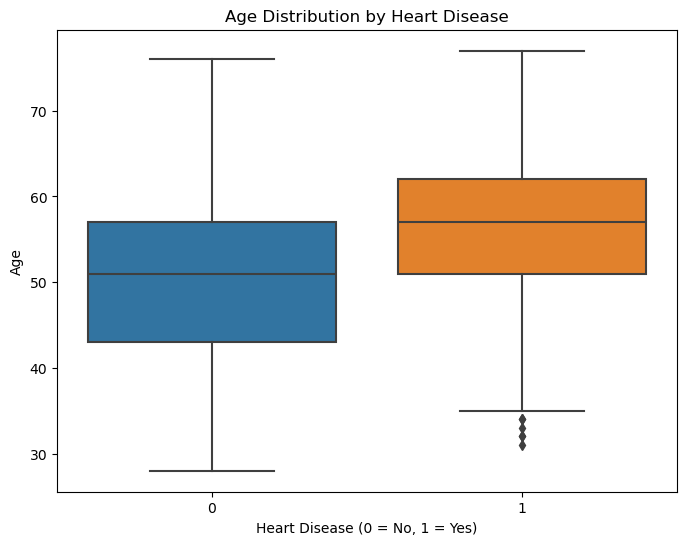

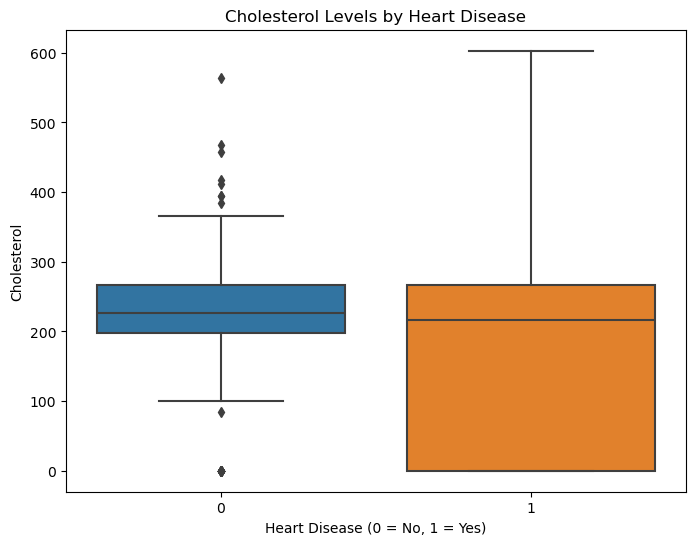

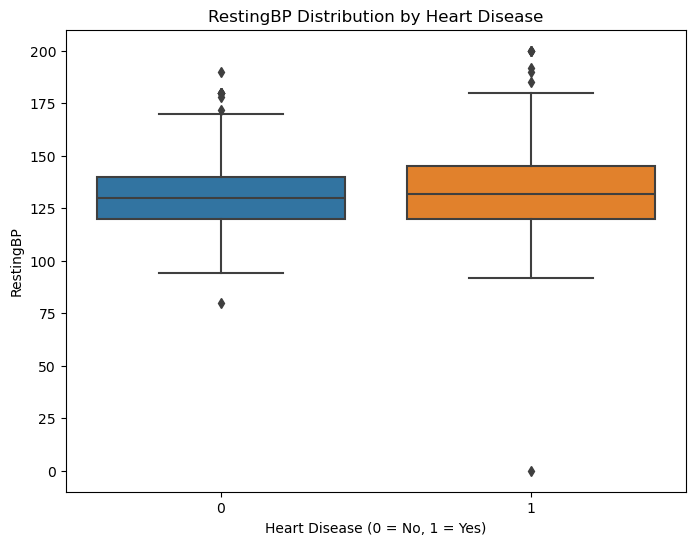

In [119]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=data)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data)
plt.title("Cholesterol Levels by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=data)
plt.title("RestingBP Distribution by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("RestingBP")
plt.show()

The boxplots show the differences in age, cholesterol, and resting blood pressure (RestingBP) between people with and without heart disease. Those with heart disease generally have slightly higher median ages, supporting the idea that older individuals are more at risk. Cholesterol levels don’t show much difference, as both groups have similar medians and a lot of outliers, which suggests cholesterol might not be a strong predictor of heart disease in this data. RestingBP also looks pretty similar between the groups, with close medians and ranges, meaning it might not be a key factor in distinguishing heart disease cases. These boxplots help to see specific trends for each group and add more details to the overall patterns.







### Proportions for Categorical Variables

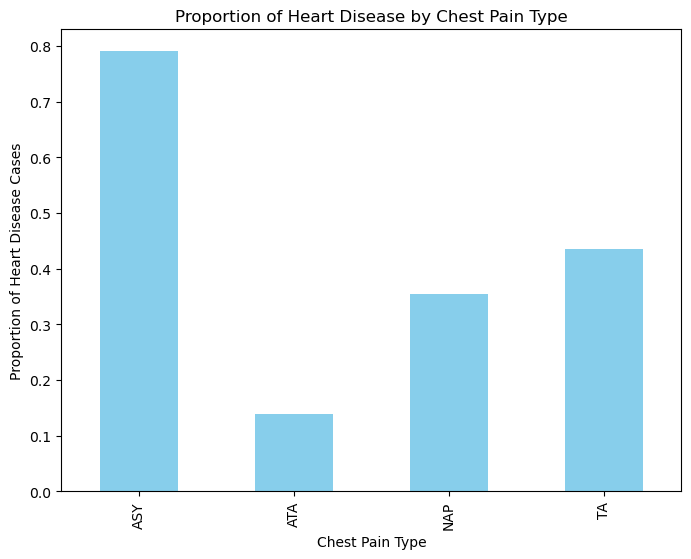

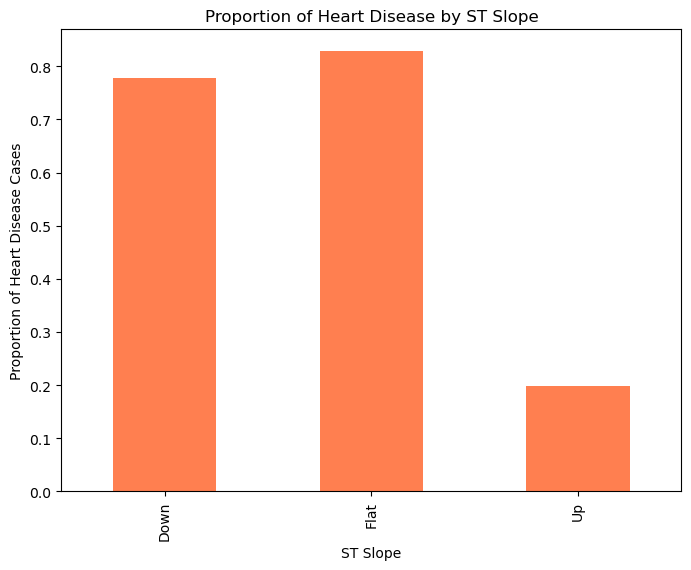

In [107]:

chest_pain_proportions = data.groupby('ChestPainType')['HeartDisease'].mean()


chest_pain_proportions.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title("Proportion of Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Proportion of Heart Disease Cases")
plt.show()


st_slope_proportions = data.groupby('ST_Slope')['HeartDisease'].mean()

st_slope_proportions.plot(kind='bar', color='coral', figsize=(8, 6))
plt.title("Proportion of Heart Disease by ST Slope")
plt.xlabel("ST Slope")
plt.ylabel("Proportion of Heart Disease Cases")
plt.show()

Proportion of Heart Disease by Chest Pain Type: The chart reveals that individuals with type 0 chest pain (asymptomatic) have the highest proportion of heart disease cases, exceeding 75%. On the other hand, type 1 (typical angina) is associated with the lowest proportion of heart disease cases, while types 2 (non-anginal pain) and 3 (atypical angina) show moderate levels. This highlights the significance of chest pain type in predicting heart disease.

Proportion of Heart Disease by ST Slope: The chart shows that ST slopes 0 (flat) and 1 (downsloping) have a high proportion of heart disease cases, both around 80%. Conversely, individuals with ST slope 2 (upsloping) have significantly lower proportions of heart disease cases. This underscores the predictive importance of ST slope in identifying heart disease risk.

### BarPlots of Categorical Variables

C:\Users\ikesc\AppData\Local\Temp\ipykernel_15724\90042032.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


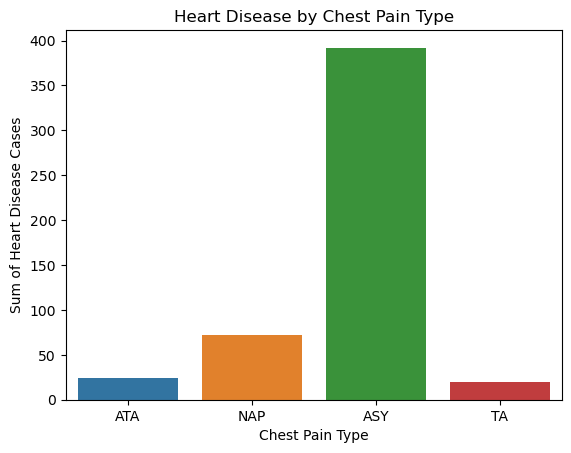

C:\Users\ikesc\AppData\Local\Temp\ipykernel_15724\90042032.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


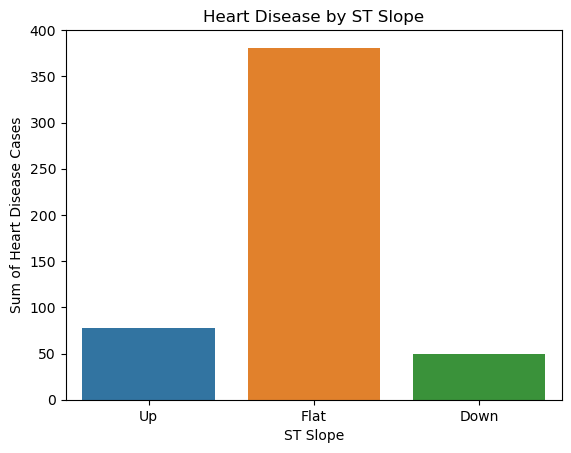

In [113]:

sns.barplot(
    x='ChestPainType', y='HeartDisease', data=data, estimator=sum, ci=None
)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Sum of Heart Disease Cases")
plt.show()

sns.barplot(
    x='ST_Slope', y='HeartDisease', data=data, estimator=sum, ci=None
)
plt.title("Heart Disease by ST Slope")
plt.xlabel("ST Slope")
plt.ylabel("Sum of Heart Disease Cases")
plt.show()

The total count plots complement the proportion plots by providing a fuller picture of the relationship between features and heart disease. While the proportion plots show the likelihood of heart disease within each category (e.g., chest pain type or ST slope), the count plots highlight the absolute number of cases in each category. For example, the proportion plots show that Type 0 Chest Pain has a high risk of heart disease, and the count plots reinforce this by showing it also has the most cases overall. Similarly, ST Slope Type 1 (Flat) is the most at risk and also has the highest total cases. Together, these results provide both relative and absolute perspectives, giving a well-rounded understanding of the data.